## Online Credit Card Transactions Fraud Detection

### Understanding the dataset

In [1]:
# Importing the required libraries

import pandas as pd
pd.set_option('precision', 3)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})
from collections import Counter
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Importing the dataset

df = pd.read_csv('CC_FRAUD.csv')
print(f"The size of the dataset is {df.shape}")
df

The size of the dataset is (94682, 20)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [3]:
# Displaying the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [4]:
# Displaying the description of the numerical features of the dataset

df.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.00,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000
mean,454.379,13.865,13.876,0.113,0.018,0.547,0.541,0.401,0.02,6.177,2.419,0.426,5.716,13.984,1.376,25.635,25.626
std,228.280,5.263,5.258,0.317,0.134,0.498,0.498,0.490,0.14,102.977,1.004,0.494,31.355,6.517,2.424,14.190,14.199
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,166.000,10.000,11.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000,2.000,0.000,-12.408,8.000,0.000,12.950,12.950
50%,600.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.00,1.000,3.000,0.000,11.640,12.000,0.000,25.900,25.900
75%,655.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.00,1.000,3.000,1.000,28.784,19.000,2.000,38.850,38.850
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.00,3278.000,4.000,1.000,65.544,46.000,26.000,95.400,95.400


In [5]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE,TRN_TYPE
count,94682,94682,94682
unique,9809,53,2
top,TMA.COM,KR,LEGIT
freq,16451,18676,92588


In [6]:
# Checking for the percentage of missing and null values (used to check how empty the dataset is)

df_null = df.isnull().sum() / len(df)*100
total_miss = df_null.sum().round(2)
print(f"Percentage of data missing {total_miss}")
df.isnull().sum()

Percentage of data missing 0.0


DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [7]:
# Checking for the completeness ratio (used to check how full the dataset is)

non_missing = df.notnull().sum().round(2)
completeness = round(sum(non_missing)/(len(df)*len(df.columns)), 2)
print("Completeness ratio:", completeness)
non_missing

Completeness ratio: 1.0


DOMAIN           94682
STATE            94682
ZIPCODE          94682
TIME1            94682
TIME2            94682
VIS1             94682
VIS2             94682
XRN1             94682
XRN2             94682
XRN3             94682
XRN4             94682
XRN5             94682
VAR1             94682
VAR2             94682
VAR3             94682
VAR4             94682
VAR5             94682
TRN_AMT          94682
TOTAL_TRN_AMT    94682
TRN_TYPE         94682
dtype: int64

In [8]:
# Checking the duplicate rate (used to check the percentage of duplicate values present)

duplicate = df.duplicated().sum()
dup_ratio = round(duplicate/len(df), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.05


In [9]:
# Checking the skew of the data

skew = pd.DataFrame(df).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.4855


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the dataset

Reasons to check skewness: If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance. 

In [10]:
# Checking for the number of unique values per feature

df.nunique()

DOMAIN            9809
STATE               53
ZIPCODE             94
TIME1               24
TIME2               24
VIS1                 2
VIS2                 2
XRN1                 2
XRN2                 2
XRN3                 2
XRN4                 2
XRN5                36
VAR1                 5
VAR2                 2
VAR3             15786
VAR4                38
VAR5                26
TRN_AMT             88
TOTAL_TRN_AMT       88
TRN_TYPE             2
dtype: int64

Here we are going to drop the column 'TOTAL_TRN_AMT' since it is the same as 'TRN_AMT' and so including it in the dataset will give us redundant data, which is unnecessary.

In [11]:
# dropping the excess column

df = df.drop(columns=['TOTAL_TRN_AMT'])
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,LEGIT


<AxesSubplot:>

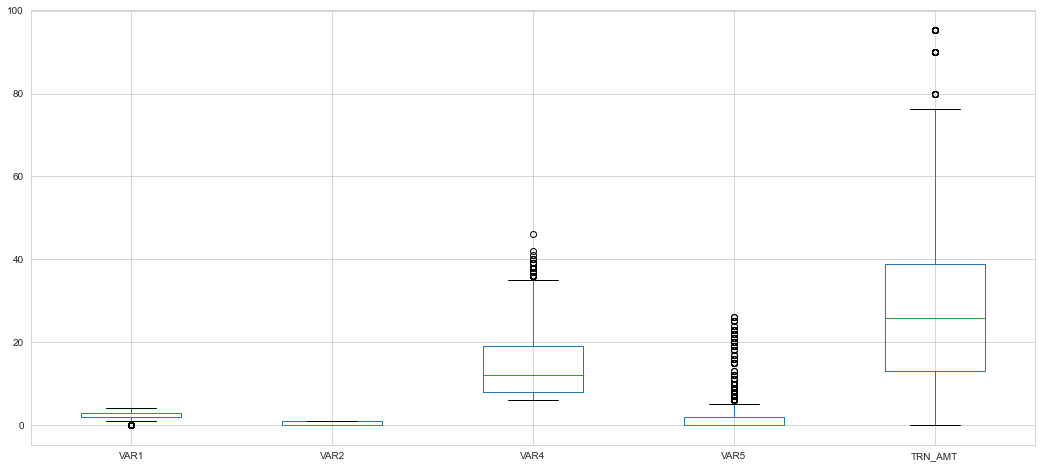

In [12]:
# Plotting the box plots of each feature

col = ['VAR1', 'VAR2', 'VAR4', 'VAR5', 'TRN_AMT']
df.boxplot(column=col, figsize = (18,8))

LEGIT    92588
FRAUD     2094
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

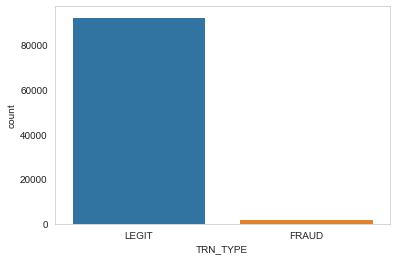

In [13]:
# Plotting the count of each class of the variable 'TRN_TYPE'

print(df['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df)

In [14]:
# Finding the Shannon Entropy

print(f"The Shannon Entropy is : {scipy.stats.entropy(df['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.10616424951553313


Reasons to check entropy: Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

The closer the entropy is to 0 the more uncertain the dataset is. Perfect value is 1.

In [15]:
# Transforming the categorical attribute 'TRN_TYPE' to a numerical attribute

print(f"The values of the attribute before transforming the data \n{df['TRN_TYPE']}")
df['TRN_TYPE'].replace(('LEGIT', 'FRAUD'), (1, 0), inplace=True)
print()
print(f"The values of the attribute after transforming the data \n{df['TRN_TYPE']}")

The values of the attribute before transforming the data 
0        LEGIT
1        LEGIT
2        LEGIT
3        LEGIT
4        LEGIT
         ...  
94677    LEGIT
94678    LEGIT
94679    LEGIT
94680    LEGIT
94681    LEGIT
Name: TRN_TYPE, Length: 94682, dtype: object

The values of the attribute after transforming the data 
0        1
1        1
2        1
3        1
4        1
        ..
94677    1
94678    1
94679    1
94680    1
94681    1
Name: TRN_TYPE, Length: 94682, dtype: int64


<AxesSubplot:>

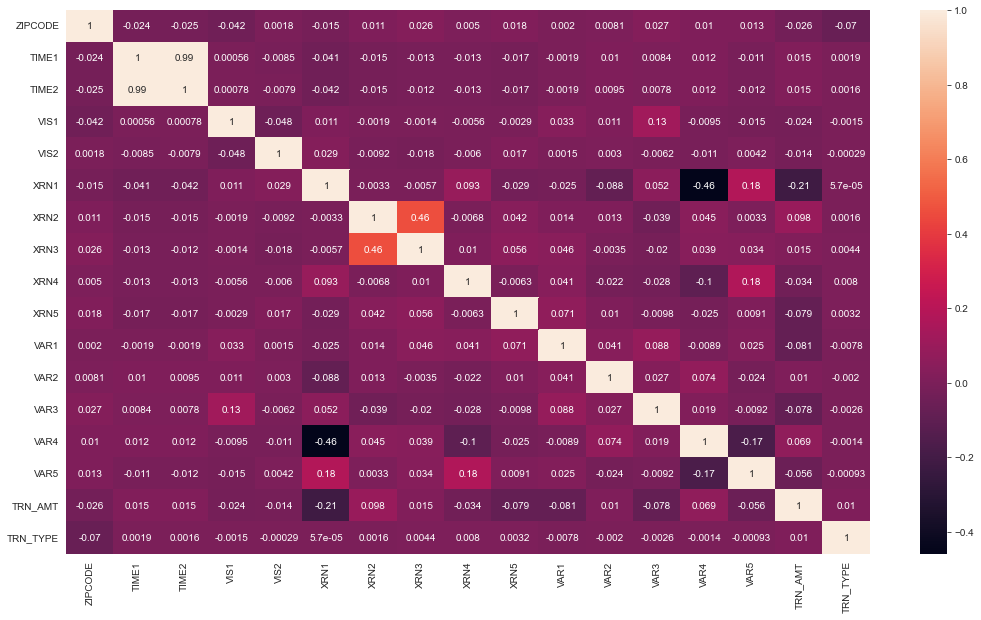

In [16]:
# Displaying the heatmap

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

### Preprocessing, transforming and analyzing the transformed data

In [17]:
# Transforming the data by peforming oversampling and undersampling

X = df.drop(columns = ['TRN_TYPE'])
y = df['TRN_TYPE']
print(f"Before sampling: {Counter(y)}")

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Before sampling: Counter({1: 92588, 0: 2094})
Oversampled: Counter({1: 92588, 0: 46294})
Combined Random Sampling: Counter({1: 57867, 0: 46294})


Since the 2 classes are highly imbalanced (as proved with the help of counterplot of the attribute 'TRN_TYPE', and Shannon Entropy) using it to train the model induces bias into the model and so we tend to transform the data to reduce the bias, the two most popular ways of transforming the data to reduce the bias is under-sampling and over-sampling, but both tend to affect the accuracy of the model.

Here we are using a combination of the two to ensure that we reduce the bias as well as do not affect the accuracy too much.

In [18]:
# Displaying the sampled data

df_sampled = X_combined_sampling
df_sampled['TRN_TYPE'] = y_combined_sampling
print(f"The size of the sampled dataset is {df_sampled.shape}")
df_sampled

The size of the sampled dataset is (104161, 19)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,VUHZRNB.COM,JAO,679,19,19,0,0,0,0,0,0,1,3,0,45.376,19,3,12.95,0
1,TMA.COM,MV,369,14,14,0,0,1,1,1,0,1,2,1,40.400,9,0,11.01,0
2,XOSOP.COM,KR,122,19,19,0,0,0,0,0,0,1,4,1,50.648,21,4,0.00,0
3,BRZWCURTY.NET,KR,120,13,13,0,0,1,0,0,0,1,3,1,39.848,8,0,36.26,0
4,TMA.COM,BR,670,21,21,0,0,0,1,1,0,1,0,0,-9.624,24,0,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,TMA.COM,VO,602,8,8,0,0,1,1,1,0,1,3,0,5.360,14,3,25.90,1
104157,TMA.COM,KR,124,1,1,0,0,1,1,1,0,3,3,0,33.168,12,0,10.36,1
104158,XOSOP.COM,KR,123,22,22,0,0,0,1,0,0,1,2,0,34.488,18,0,10.36,1
104159,GQNBAPV.COM,KR,116,4,4,0,0,0,0,1,0,1,0,0,-10.872,18,0,49.95,1


In [19]:
# Displaying the info of the sampled dataset

df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104161 entries, 0 to 104160
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DOMAIN    104161 non-null  object 
 1   STATE     104161 non-null  object 
 2   ZIPCODE   104161 non-null  int64  
 3   TIME1     104161 non-null  int64  
 4   TIME2     104161 non-null  int64  
 5   VIS1      104161 non-null  int64  
 6   VIS2      104161 non-null  int64  
 7   XRN1      104161 non-null  int64  
 8   XRN2      104161 non-null  int64  
 9   XRN3      104161 non-null  int64  
 10  XRN4      104161 non-null  int64  
 11  XRN5      104161 non-null  int64  
 12  VAR1      104161 non-null  int64  
 13  VAR2      104161 non-null  int64  
 14  VAR3      104161 non-null  float64
 15  VAR4      104161 non-null  int64  
 16  VAR5      104161 non-null  int64  
 17  TRN_AMT   104161 non-null  float64
 18  TRN_TYPE  104161 non-null  int64  
dtypes: float64(2), int64(15), object(2)
memory u

In [20]:
# Checking for the number of unique values per feature

df_sampled.nunique()

DOMAIN       7323
STATE          53
ZIPCODE        94
TIME1          24
TIME2          24
VIS1            2
VIS2            2
XRN1            2
XRN2            2
XRN3            2
XRN4            2
XRN5           35
VAR1            5
VAR2            2
VAR3        14344
VAR4           36
VAR5           25
TRN_AMT        78
TRN_TYPE        2
dtype: int64

In [21]:
# Displaying the description of the numerical features of the dataset

df_sampled.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
count,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000
mean,499.965,13.849,13.863,0.115,0.018,0.546,0.539,0.396,0.016,5.127,2.441,0.429,5.984,14.026,1.391,25.245,0.556
std,221.637,5.164,5.157,0.319,0.134,0.498,0.498,0.489,0.127,85.897,0.988,0.495,31.332,6.445,2.413,14.330,0.497
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,356.000,11.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,-12.096,9.000,0.000,12.950,0.000
50%,644.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,3.000,0.000,11.792,12.000,0.000,20.720,1.000
75%,670.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,3.000,1.000,28.856,19.000,2.000,38.850,1.000
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.000,3278.000,4.000,1.000,65.184,42.000,26.000,95.400,1.000


In [22]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE
count,94682,94682
unique,9809,53
top,TMA.COM,KR
freq,16451,18676


In [23]:
# Checking the duplicate rate of the sampled data(used to check the percentage of duplicate values present)

duplicate = df_sampled.duplicated().sum()
dup_ratio = round(duplicate/len(df_sampled), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.45


In [24]:
# Checking the skew of the sampled data

skew = pd.DataFrame(df_sampled).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.615


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the sampled dataset

1    57867
0    46294
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

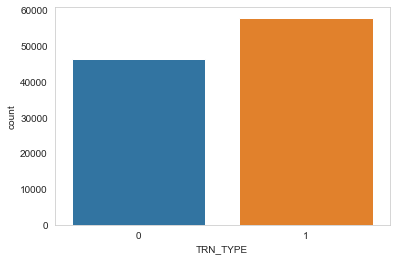

In [25]:
# Displaying the countplot of the column 'TRN_TYPE' of the sampled data

print(df_sampled['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df_sampled)

<AxesSubplot:>

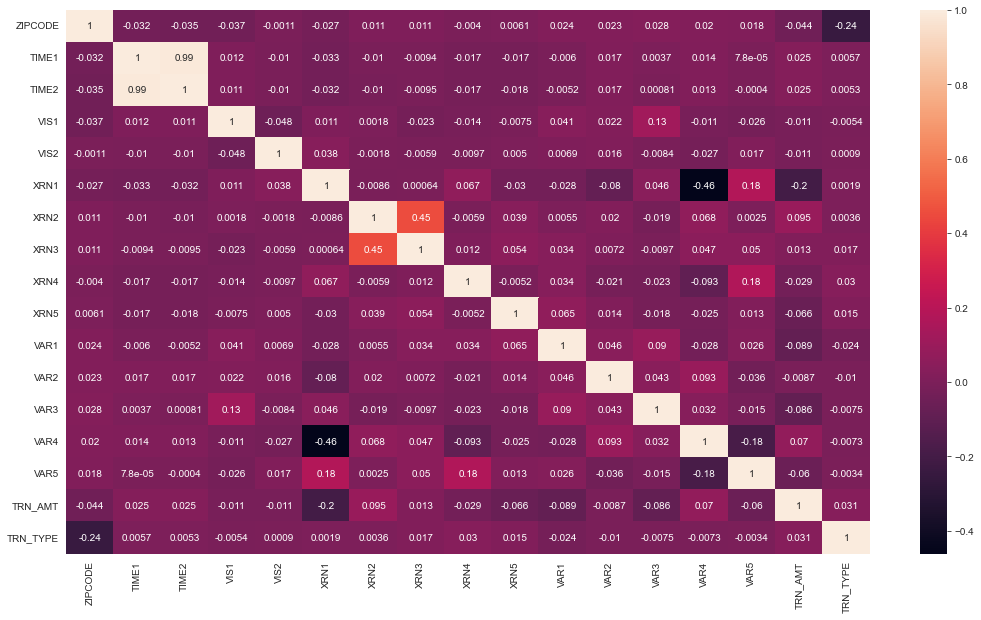

In [26]:
# Displaying the heatmap of the sampled data

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df_sampled.corr(), annot=True)

In [27]:
# Displaying the Shannon Entropy of the sampled data

print(f"The Shannon Entropy is : {scipy.stats.entropy(df_sampled['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.6869620526535805


As you can see transforming the data using a combination of under-sampling and over-sampling did improve the quality of our dataset and this fact is proved by the increased Shannon Entropy score from 0.10 initially to 0.68 after the transformation.

### Visualizing the data

In [28]:
# Displaying the count of each unique value for all the attributes

columns = ['VIS1','VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5']
for i in columns:
    print(f"For the column {i} the count of each value is \n{df_sampled[i].value_counts()}\n")

For the column VIS1 the count of each value is 
0    92184
1    11977
Name: VIS1, dtype: int64

For the column VIS2 the count of each value is 
0    102257
1      1904
Name: VIS2, dtype: int64

For the column XRN1 the count of each value is 
1    56893
0    47268
Name: XRN1, dtype: int64

For the column XRN2 the count of each value is 
1    56171
0    47990
Name: XRN2, dtype: int64

For the column XRN3 the count of each value is 
0    62955
1    41206
Name: XRN3, dtype: int64

For the column XRN4 the count of each value is 
0    102455
1      1706
Name: XRN4, dtype: int64

For the column XRN5 the count of each value is 
1       79690
2       19442
3        3313
4         815
6         206
5         205
200        82
1600       81
7          67
3278       36
1643       36
364        32
1434       26
8          23
373        21
20         15
32         12
977        10
0           9
150         6
29          6
162         6
39          3
983         3
984         2
118         2
77      

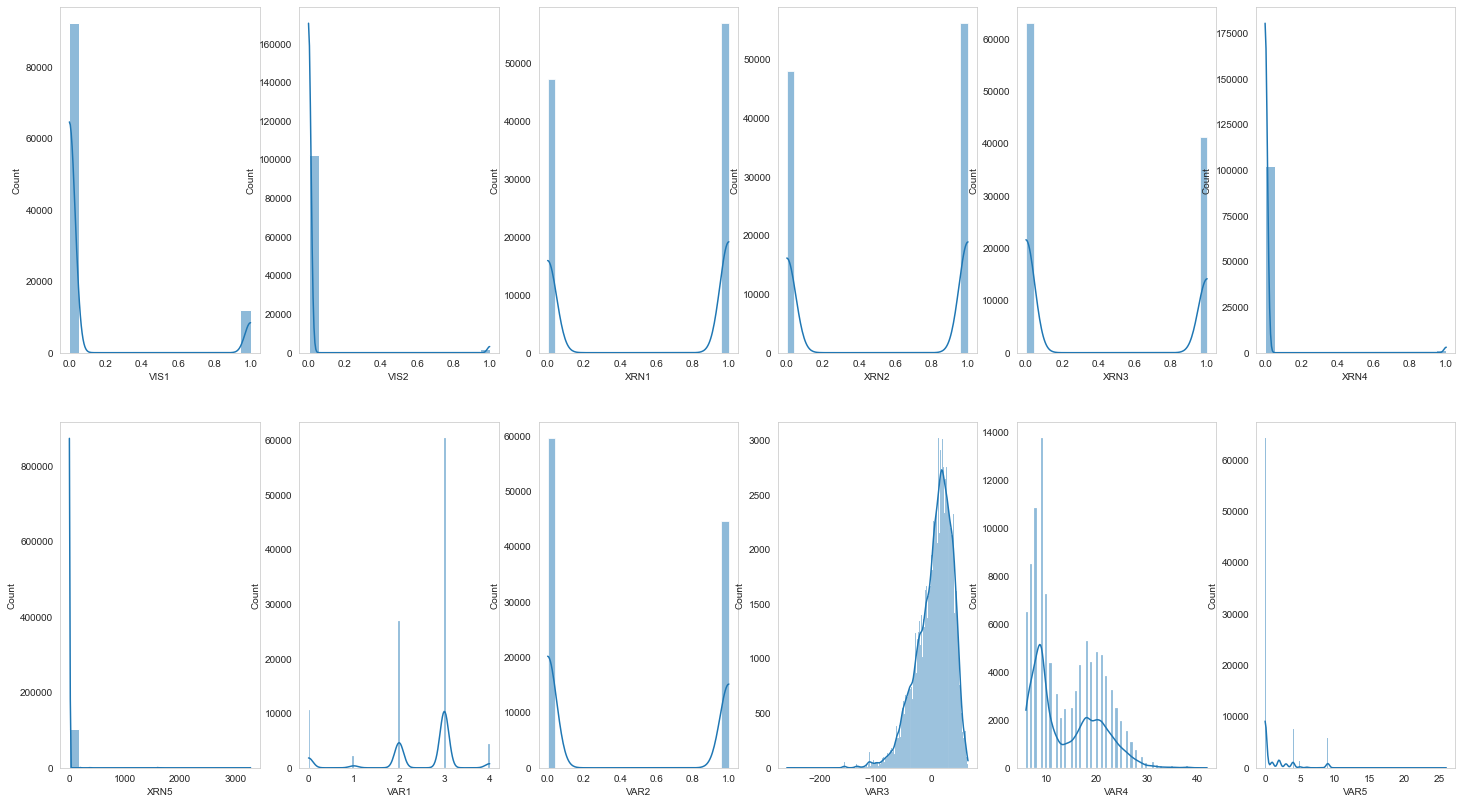

In [29]:
# Plotting the histogram for all the attributes

figure, axis = plt.subplots(2, 6, figsize=(25, 14))
i = 0
for ax in axis[0]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
for ax in axis[1]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
plt.show()

ZIPCODE     -0.855
TIME1       -0.412
TIME2       -0.408
VIS1         2.414
VIS2         7.192
XRN1        -0.186
XRN2        -0.158
XRN3         0.427
XRN4         7.621
XRN5        27.915
VAR1        -1.338
VAR2         0.288
VAR3        -0.951
VAR4         0.579
VAR5         2.169
TRN_AMT      0.381
TRN_TYPE    -0.224
dtype: float64

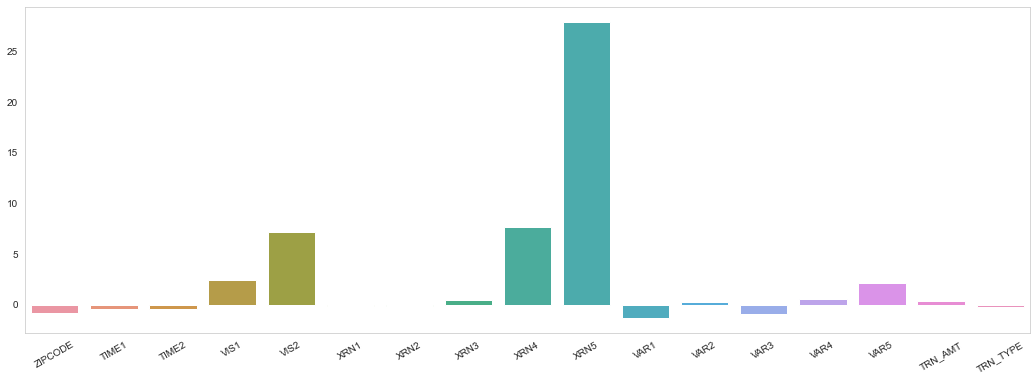

In [30]:
# Plotting the skew plot for all the attributes

plt.subplots(figsize=(18, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

ZIPCODE      -0.957
TIME1        -0.016
TIME2        -0.019
VIS1          3.827
VIS2         49.727
XRN1         -1.966
XRN2         -1.975
XRN3         -1.818
XRN4         56.075
XRN5        885.482
VAR1          1.181
VAR2         -1.917
VAR3          1.293
VAR4         -0.723
VAR5          5.004
TRN_AMT      -0.897
TRN_TYPE     -1.950
dtype: float64

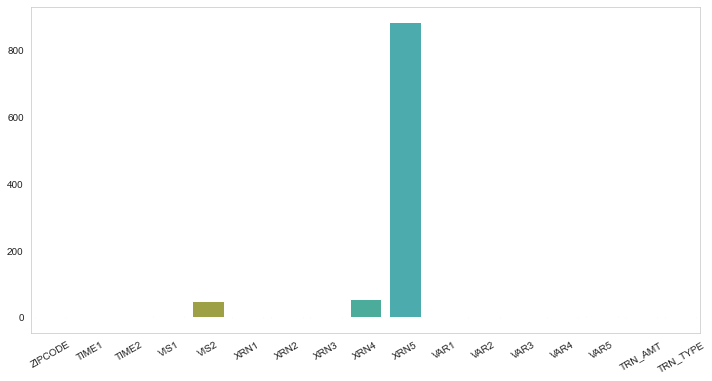

In [31]:
# Plotting the kurtosis plot for all the attributes

plt.subplots(figsize=(12, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.kurt())
plt.xticks(rotation = 30)
df_sampled.kurt()

Reason to check kurtosis: Kurtosis identifies whether the tails of a given distribution contain extreme values. In other words, kurtosis determines the heaviness of the distribution tails.

Since the attribute 'XRN5' is heavily dominating in both the skew and kurtosis values, we are removing it to see, clearly, the distribution of skew and kurtosis of the other attributes.

ZIPCODE     -0.855
TIME1       -0.412
TIME2       -0.408
VIS1         2.414
VIS2         7.192
XRN1        -0.186
XRN2        -0.158
XRN3         0.427
XRN4         7.621
XRN5        27.915
VAR1        -1.338
VAR2         0.288
VAR3        -0.951
VAR4         0.579
VAR5         2.169
TRN_AMT      0.381
TRN_TYPE    -0.224
dtype: float64

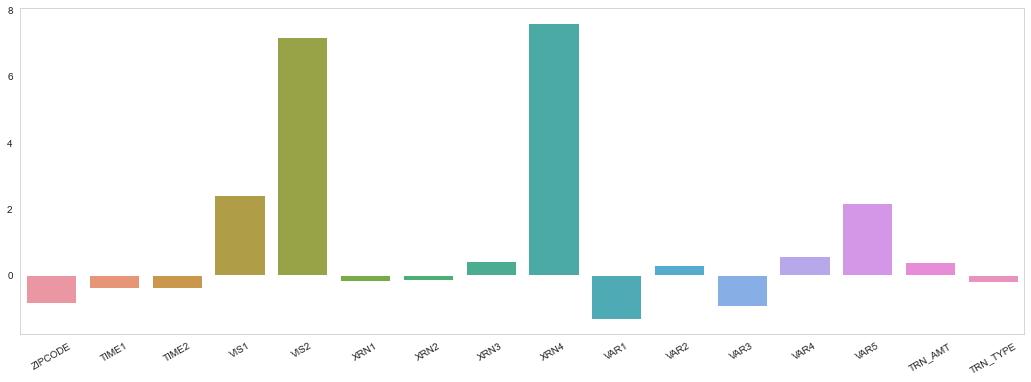

In [32]:
# Plotting the skew of all attributes except 'XRN5'

df_sampled_withoutXRN5 = df_sampled.drop(columns = ['XRN5'])
plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

ZIPCODE     -0.957
TIME1       -0.016
TIME2       -0.019
VIS1         3.827
VIS2        49.727
XRN1        -1.966
XRN2        -1.975
XRN3        -1.818
XRN4        56.075
VAR1         1.181
VAR2        -1.917
VAR3         1.293
VAR4        -0.723
VAR5         5.004
TRN_AMT     -0.897
TRN_TYPE    -1.950
dtype: float64

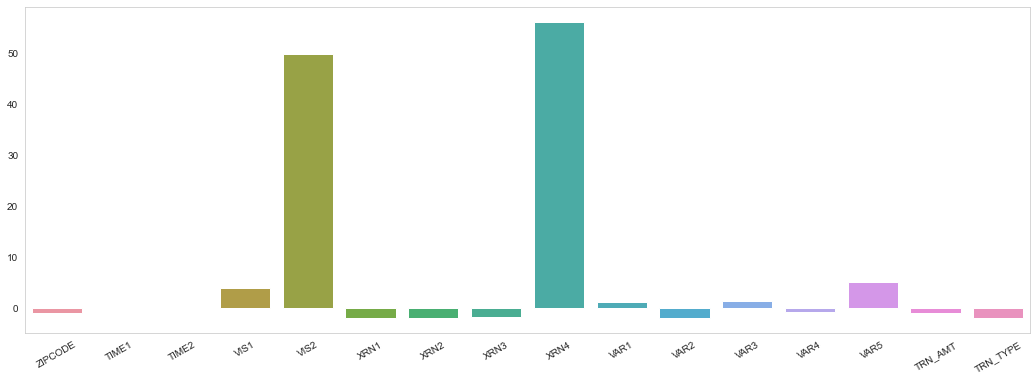

In [33]:
# Plotting the kurtosis of all attributes except 'XRN5'

plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.kurt())
plt.xticks(rotation = 30)
df_sampled_withoutXRN5.kurt()

### Performing standard scalar to transform the data and randomizing the ordering of the records

In [34]:
# Splitting the depandant and independant attributes into X and y

X, y = df_sampled.drop(columns = ['DOMAIN', 'STATE', 'TRN_TYPE'], axis = 1), df_sampled['TRN_TYPE'] 

In [35]:
# Performing the standard scalar

scaler = StandardScaler()
dfsampled_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
dfsampled_norm

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT
0,0.808,0.997,0.996,-0.36,-0.136,-1.097,-1.082,-0.809,-0.129,-0.048,0.566,-0.866,1.257,0.772,0.667,-0.858
1,-0.591,0.029,0.026,-0.36,-0.136,0.911,0.924,1.236,-0.129,-0.048,-0.446,1.154,1.098,-0.780,-0.576,-0.993
2,-1.705,0.997,0.996,-0.36,-0.136,-1.097,-1.082,-0.809,-0.129,-0.048,1.578,1.154,1.426,1.082,1.081,-1.762
3,-1.714,-0.165,-0.167,-0.36,-0.136,0.911,-1.082,-0.809,-0.129,-0.048,0.566,1.154,1.081,-0.935,-0.576,0.769
4,0.767,1.385,1.384,-0.36,-0.136,-1.097,0.924,1.236,-0.129,-0.048,-2.471,-0.866,-0.498,1.548,-0.576,-0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,0.460,-1.133,-1.137,-0.36,-0.136,0.911,0.924,1.236,-0.129,-0.048,0.566,-0.866,-0.020,-0.004,0.667,0.046
104157,-1.696,-2.488,-2.495,-0.36,-0.136,0.911,0.924,1.236,-0.129,-0.025,0.566,-0.866,0.868,-0.314,-0.576,-1.039
104158,-1.701,1.578,1.578,-0.36,-0.136,-1.097,0.924,-0.809,-0.129,-0.048,-0.446,-0.866,0.910,0.617,-0.576,-1.039
104159,-1.732,-1.907,-1.913,-0.36,-0.136,-1.097,-1.082,1.236,-0.129,-0.048,-2.471,-0.866,-0.538,0.617,-0.576,1.724


In [36]:
# Spliting the dataset into train and test in the ratio 80:20 while randomizing and shuffling it

X = dfsampled_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

### Building the ML model to classify the future transactions

Here we will be training a series of models, and evaluating their results/scores to choose the best model suited for the classification task at hand.

The models that we will be training are as follows:-
1. Logistic Regression
2. Decision Trees
3. Random Forest Classification
4. Naïve Bayes Classification
5. K-Nearest Neighbors (KNN)

In [37]:
# Creating a function to generate the performance metrics for each of the model being trained
def performance_metrics(y_test, pred, prob):
    return {
        'classification_report': metrics.classification_report(y_test, pred),
        'logloss' : metrics.log_loss(y_test, pred),
        'AUROC' : metrics.roc_auc_score(y_test, prob),
        'AUPRC' : metrics.average_precision_score(y_test, prob, average='weighted'),
        'confusion_matrix' : metrics.confusion_matrix(y_test, pred),
    }

# Printing the performance metrics for each of the model being trained
def print_metrics(model, scores):
    for key, value in scores.items():
        if key is not 'confusion_matrix' and key is not 'classification_report':
            print(f"The {key} of the model built using {model} Classifier is {value:0.5f}")
        else:
            print(f"\nThe {key} of the model built using {model} Classifier is \n{value}")

            
# Displaying the confusion matrix as a heatmap for visualization
def disp_heatmap(matrix):
    sns.heatmap(matrix, annot=True, fmt='.2f', xticklabels=['LEGIT', 'FRAUD'], yticklabels=['LEGIT', 'FRAUD'], annot_kws={"size":12})
    plt.show()

# Displaying the Reciever Operating Characteristic (ROC) curve for visualization
def roc_curve(y_test, probs):
    print('\nThe Receiver Operating Characteristic (ROC) curve is')
    fpr, tpr, _ = metrics.roc_curve(y_test, probs)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.show()

# Displaying the Precision-Recall (PR) curve for visualization
def pr_curve(y_test, probs):
    print('\nThe Precision-Recall (PR) curve is')
    precision, recall, _ = metrics.precision_recall_curve(y_test, probs)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# Displaying all the three curves for visualization
def disp_graphs(matrix, y_test, props):
    disp_heatmap(scores['confusion_matrix'])
    roc_curve(y_test, props)
    pr_curve(y_test, props)

The performance metrics that we will be using to measure the performance of the models are same for all the models and so instead of repeating the process of computing and displaying the metrics we are simply creating a set of functions to automate the task.

Each function above is responsible for a certain task
1. performance_metrics - To compute the various performance metrics and return them as a dictionary
2. print_metrics - To print the performance metrics computed by the function 'performance_metrics'
3. disp_heatmap - To display the heatmap of the confusion matrix
4. aoc_curve - To display the Receiver Operating Characteristic (ROC) curve of the model
5. pr_curve - To display the Precision-Recall (PR) curve of the model
6. disp_graphs - To display the heatmap, aoc_curve and pr_curve together

**Note : The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets**

#### 1. Logistic Regression

Here we will be performing Logistic regression specifically **Binary Logistic Regression**, since we only want to classify between two variables, whether the transactions are 'LEGIT' or 'FRAUD'.

In [38]:
# Initializing the Logistic Regression class, of sklearn library, with various solvers and using it to predict for X_test

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = dict()
props = dict()
for i in solvers:
    log_reg = LogisticRegression(solver=i)
    log_reg.fit(X_train, y_train)
    pred = log_reg.predict(X_test)
    props[i] = log_reg.predict_proba(X_test)[:,1]
    scores[i] = performance_metrics(y_test, pred, props[i])

Note :- The default solver for the Logistic Regression class, of sklearn library is 'lbfgs'

In [39]:
# Checking the accuracy of our model

for solver, m_score in scores.items():
    print(f"For the Logistic regression model trained using the solver \'{solver}\'\n")
    for metric, score in m_score.items():
        if metric is 'classification_report':
            print(f"The {metric} score is \n{score}")
            continue
        if metric is not 'confusion_matrix':
            print(f"The {metric} score is {score:.6f}")
    print('\n\n')

For the Logistic regression model trained using the solver 'newton-cg'

The classification_report score is 
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      9325
           1       0.71      0.57      0.63     11508

    accuracy                           0.63     20833
   macro avg       0.64      0.64      0.63     20833
weighted avg       0.65      0.63      0.63     20833

The logloss score is 12.682946
The AUROC score is 0.662178
The AUPRC score is 0.677898



For the Logistic regression model trained using the solver 'lbfgs'

The classification_report score is 
              precision    recall  f1-score   support

           0       0.57      0.71      0.63      9325
           1       0.71      0.57      0.63     11508

    accuracy                           0.63     20833
   macro avg       0.64      0.64      0.63     20833
weighted avg       0.65      0.63      0.63     20833

The logloss score is 12.684604
The AUROC sco

The confusion matrix for the logistic regression using the solver 'newton-cg' is:


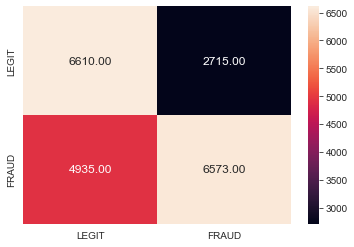

The confusion matrix for the logistic regression using the solver 'lbfgs' is:


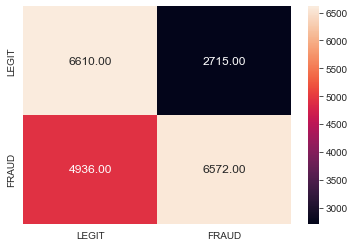

The confusion matrix for the logistic regression using the solver 'liblinear' is:


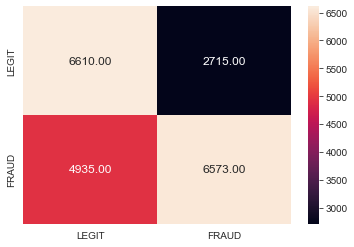

The confusion matrix for the logistic regression using the solver 'sag' is:


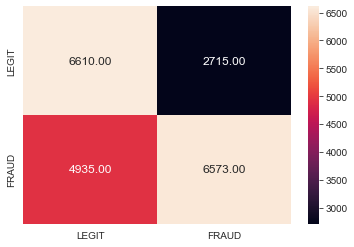

The confusion matrix for the logistic regression using the solver 'saga' is:


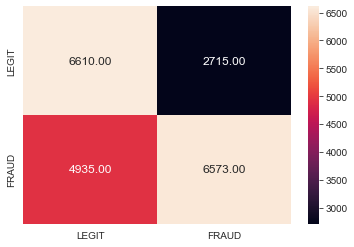

In [40]:
# Displaying the confusion matrix as a heatmap for visualization

for solver, score in scores.items():
    print(f'The confusion matrix for the logistic regression using the solver \'{solver}\' is:')
    disp_heatmap(score['confusion_matrix'])

The ROC and PR curves for the logistic regression using the solver 'newton-cg' is:

The Receiver Operating Characteristic (ROC) curve is


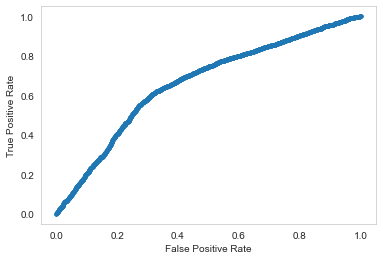


The Precision-Recall (PR) curve is


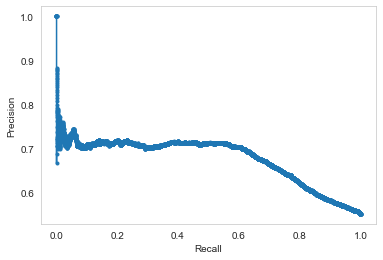




The ROC and PR curves for the logistic regression using the solver 'lbfgs' is:

The Receiver Operating Characteristic (ROC) curve is


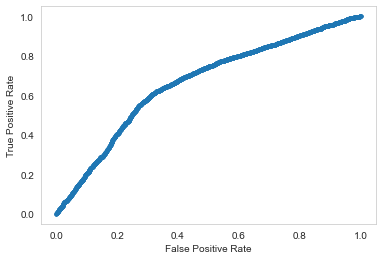


The Precision-Recall (PR) curve is


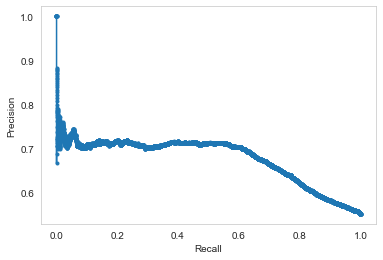




The ROC and PR curves for the logistic regression using the solver 'liblinear' is:

The Receiver Operating Characteristic (ROC) curve is


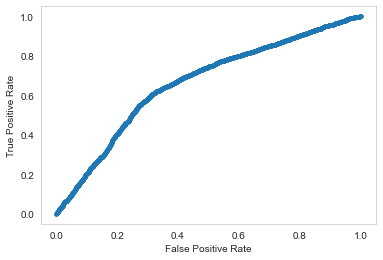


The Precision-Recall (PR) curve is


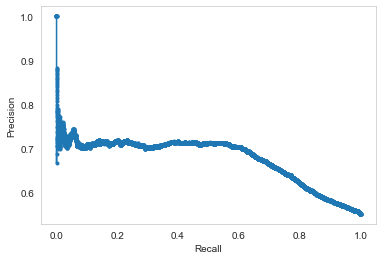




The ROC and PR curves for the logistic regression using the solver 'sag' is:

The Receiver Operating Characteristic (ROC) curve is


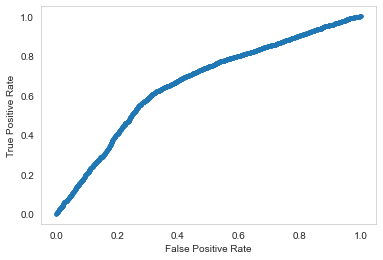


The Precision-Recall (PR) curve is


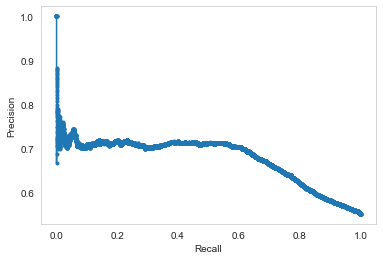




The ROC and PR curves for the logistic regression using the solver 'saga' is:

The Receiver Operating Characteristic (ROC) curve is


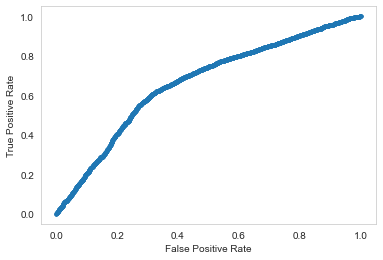


The Precision-Recall (PR) curve is


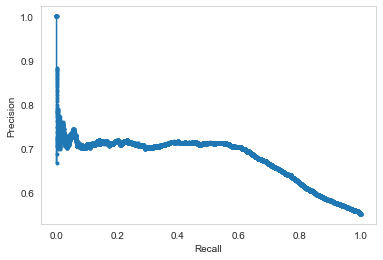

In [41]:
for solver, prop in props.items():
    print(f'The ROC and PR curves for the logistic regression using the solver \'{solver}\' is:')
    roc_curve(y_test, prop)
    pr_curve(y_test, prop)
    print('\n\n')

As you can see all the solvers have minute differences in their accuracy score, recall score, f1 score, logloss score, AUPRC score(the area under the precision-recall curve - a useful performance metric for imbalanced data in a problem setting where more preference is given to finding the positive examples) as well as classification scores which means no matter what solver we use the accuracy of the model trained using logistic regression is going to be 63.13% which is not such a highly accurate model, and so we can not use it for our real world purposes.

In [42]:
log_reg = LogisticRegression()
param_grid = {
'penalty' : ['l1', 'l2', 'none'],
'C' : np.logspace(-4, 4, 20),
'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
'max_iter' : [100, 1000, 2500]
}
grid_log = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1)
grid_log.fit(X_train, y_train)
print(grid_log.best_params_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
{'C': 0.0006951927961775605, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [43]:
log_reg = LogisticRegression(C=0.0006951927961775605, max_iter= 100, penalty = 'l1', solver= 'saga')
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
props = log_reg.predict_proba(X_test)[:,1]
scores = performance_metrics(y_test, pred, props)


The classification_report of the model built using Logistic Regression Classifier is 
              precision    recall  f1-score   support

           0       0.60      0.72      0.65      9325
           1       0.73      0.61      0.66     11508

    accuracy                           0.66     20833
   macro avg       0.66      0.66      0.66     20833
weighted avg       0.67      0.66      0.66     20833

The logloss of the model built using Logistic Regression Classifier is 11.85068
The AUROC of the model built using Logistic Regression Classifier is 0.65140
The AUPRC of the model built using Logistic Regression Classifier is 0.67384

The confusion_matrix of the model built using Logistic Regression Classifier is 
[[6673 2652]
 [4496 7012]]


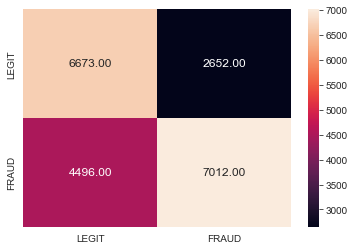


The Receiver Operating Characteristic (ROC) curve is


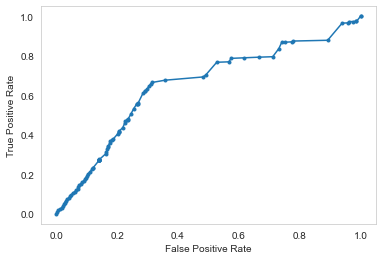


The Precision-Recall (PR) curve is


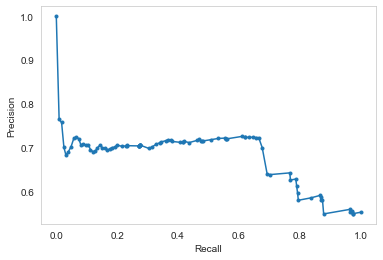

In [44]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Logistic Regression', scores)


# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

#### 2. Decision Trees

Here we will be building a model using the Decision Tree Classifier

In [45]:
 # Initializing the Decision Tree class, of sklearn library, using it to predict for X_test

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
props = clf.predict_proba(X_test)[:,1]
pred = clf.predict(X_test)


The classification_report of the model built using Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9325
           1       1.00      0.96      0.98     11508

    accuracy                           0.98     20833
   macro avg       0.98      0.98      0.98     20833
weighted avg       0.98      0.98      0.98     20833

The logloss of the model built using Decision Tree Classifier is 0.71621
The AUROC of the model built using Decision Tree Classifier is 0.98159
The AUPRC of the model built using Decision Tree Classifier is 0.98438

The confusion_matrix of the model built using Decision Tree Classifier is 
[[ 9325     0]
 [  432 11076]]


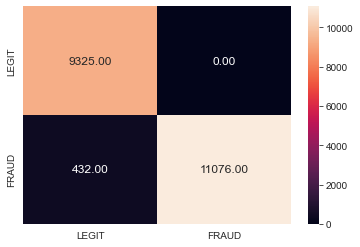


The Receiver Operating Characteristic (ROC) curve is


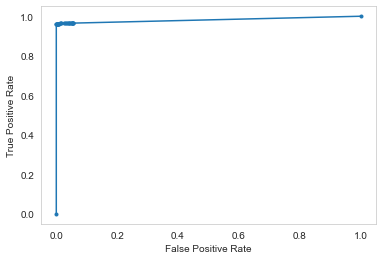


The Precision-Recall (PR) curve is


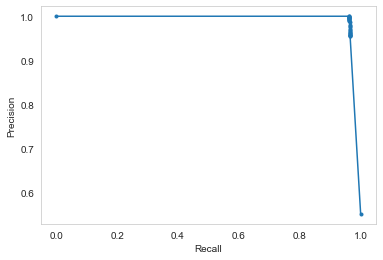

In [46]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Decision Tree', scores)


# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

In [47]:
# Finding the best parameters to use with Random Forest Classifier using GridSearchCV for training the model

clf=tree.DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1, 15), None],
    'min_samples_split': range(1, 10),
    'max_features': ['auto','sqrt', 'log2'], 
    'min_samples_leaf': range(1, 5),
    'max_depth' : [range(20, 200, 20), None],
    'max_leaf_nodes': [range(100, 300, 25), None],
}
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


In [48]:
clf = grid_clf.best_estimator_
clf.fit(X_train, y_train)
props = clf.predict_proba(X_test)[:,1]
pred = clf.predict(X_test)


The classification_report of the model built using Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9325
           1       1.00      0.96      0.98     11508

    accuracy                           0.98     20833
   macro avg       0.98      0.98      0.98     20833
weighted avg       0.98      0.98      0.98     20833

The logloss of the model built using Decision Tree Classifier is 0.75434
The AUROC of the model built using Decision Tree Classifier is 0.98054
The AUPRC of the model built using Decision Tree Classifier is 0.98349

The confusion_matrix of the model built using Decision Tree Classifier is 
[[ 9325     0]
 [  455 11053]]


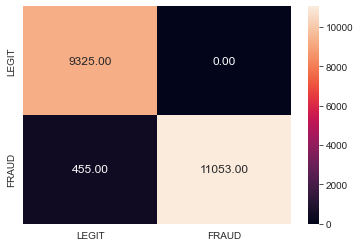


The Receiver Operating Characteristic (ROC) curve is


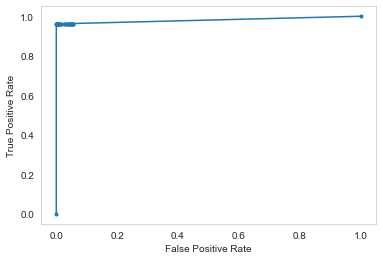


The Precision-Recall (PR) curve is


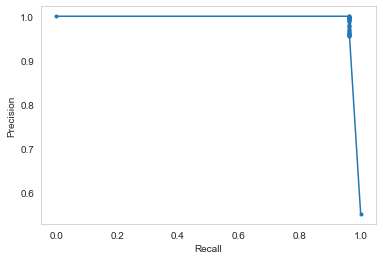

In [49]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Decision Tree', scores)


# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

In [68]:
# Plotting the Decision Tree for visualization

plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10)
plt.show()

#### 3. Random Forest Classification

Here we will be bulding a model using the Random Forest Classifier

In [51]:
# Initializing the Random Forest Classification class, of sklearn library, using it to predict for X_test

clf=RandomForestClassifier(max_depth = 100, n_estimators=100)
clf.fit(X_train,y_train)
props = clf.predict_proba(X_test)[:,1]
pred=clf.predict(X_test)


The classification_report of the model built using Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9325
           1       1.00      0.99      0.99     11508

    accuracy                           0.99     20833
   macro avg       0.99      0.99      0.99     20833
weighted avg       0.99      0.99      0.99     20833

The logloss of the model built using Random Forest Classifier is 0.22547
The AUROC of the model built using Random Forest Classifier is 0.99878
The AUPRC of the model built using Random Forest Classifier is 0.99897

The confusion_matrix of the model built using Random Forest Classifier is 
[[ 9325     0]
 [  136 11372]]


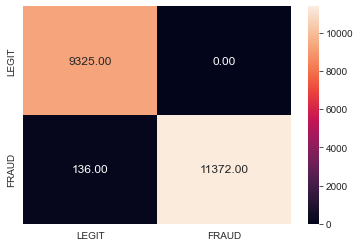


The Receiver Operating Characteristic (ROC) curve is


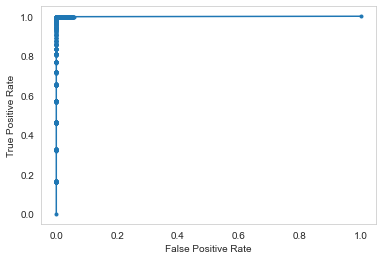


The Precision-Recall (PR) curve is


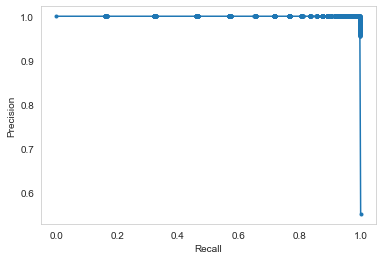

In [52]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Random Forest', scores)


# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

In [53]:
# Finding the best parameters to use with Random Forest Classifier using GridSearchCV for training the model

clf=RandomForestClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [range(1, 15), None],
    'max_features': ['auto', 'log2'], 
    'max_depth' : [range(10, 200, 10), None],
    'max_leaf_nodes': [range(100, 300, 20), None],
    'n_estimators': [range(5, 15), 20, 30, 50],
}
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 50}


In [54]:
clf=grid_clf.best_estimator_
clf.fit(X_train,y_train)
props = clf.predict_proba(X_test)[:,1]
pred=clf.predict(X_test)


The classification_report of the model built using Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9325
           1       1.00      0.99      0.99     11508

    accuracy                           0.99     20833
   macro avg       0.99      0.99      0.99     20833
weighted avg       0.99      0.99      0.99     20833

The logloss of the model built using Random Forest Classifier is 0.22713
The AUROC of the model built using Random Forest Classifier is 0.99877
The AUPRC of the model built using Random Forest Classifier is 0.99896

The confusion_matrix of the model built using Random Forest Classifier is 
[[ 9325     0]
 [  137 11371]]


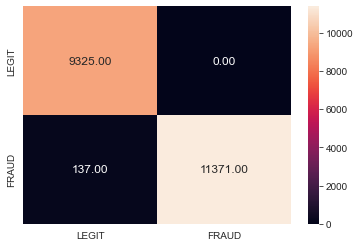


The Receiver Operating Characteristic (ROC) curve is


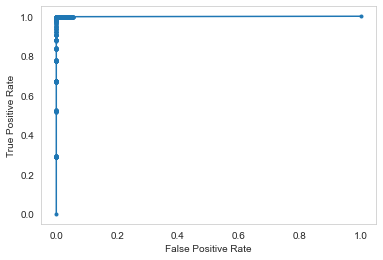


The Precision-Recall (PR) curve is


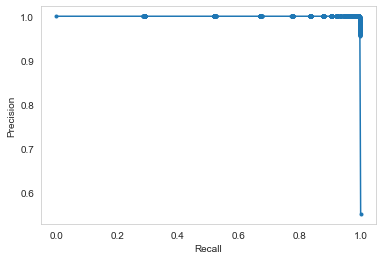

In [55]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Random Forest', scores)


# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

#### 4. Naïve Bayes Classification

Here we will be building a model using the Naïve Bayes Classifier

In [56]:
# Initializing the various methods of the Naïve Bayes Classification class, of sklearn library, using it to predict for X_test

types_nb = {
    'GaussianNB' : naive_bayes.GaussianNB(), 
    'BernoulliNB' : naive_bayes.BernoulliNB(), 
}
score_nb = []
for _, nb in types_nb.items():
    nb.fit(X_train, y_train)
    pred = nb.predict(X_test)
    score_nb.append(metrics.accuracy_score(y_test, pred))

In [57]:
# Selecting the best Naïve Bayes Classification method to train the model

max_score, best_method = 0, ''
methods = list(types_nb.keys())
for method, score in enumerate(score_nb):
    print(f"The accuracy of the model built using Naïve Bayes Classifier with {methods[method]} method is {score:0.5f}")
    if max_score < score: max_score, best_method = score, method
print(f"\nThe highest accuracy possible using a model built with Naïve Bayes is {max_score:0.5f} and it occurs when we use the {methods[best_method]} method")

The accuracy of the model built using Naïve Bayes Classifier with GaussianNB method is 0.54462
The accuracy of the model built using Naïve Bayes Classifier with BernoulliNB method is 0.60985

The highest accuracy possible using a model built with Naïve Bayes is 0.60985 and it occurs when we use the BernoulliNB method


In [58]:
# Building the Naïve Bayes model with the method selected after filteration 

nb = types_nb[methods[best_method]]
nb.fit(X_train, y_train)
props = nb.predict_proba(X_test)[:,1]
pred = nb.predict(X_test)


The classification_report of the model built using Naïve Bayes Classifier is 
              precision    recall  f1-score   support

           0       0.55      0.74      0.63      9325
           1       0.70      0.51      0.59     11508

    accuracy                           0.61     20833
   macro avg       0.63      0.62      0.61     20833
weighted avg       0.63      0.61      0.61     20833

The logloss of the model built using Naïve Bayes Classifier is 13.47541
The AUROC of the model built using Naïve Bayes Classifier is 0.63447
The AUPRC of the model built using Naïve Bayes Classifier is 0.66714

The confusion_matrix of the model built using Naïve Bayes Classifier is 
[[6856 2469]
 [5659 5849]]


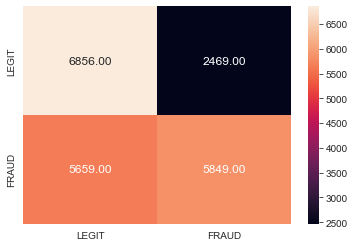


The Receiver Operating Characteristic (ROC) curve is


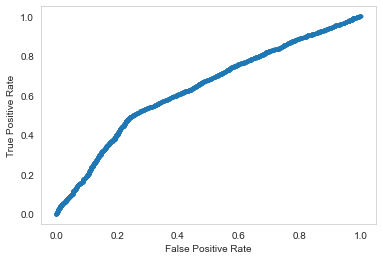


The Precision-Recall (PR) curve is


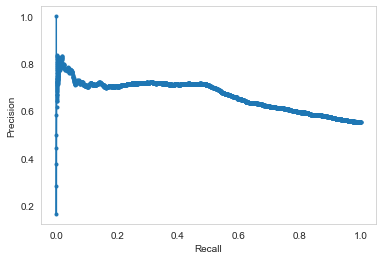

In [59]:
# Checking the accuracy of our model

scores = performance_metrics(y_test, pred, props)
print_metrics('Naïve Bayes', scores)

# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

**Note: Naïve Bayes methods have almost no hyperparameters to tune, so they usually generalizes well.**

#### 5. K-Nearest Neighbor (KNN)

Here we will be building a model using the K-Nearest Neighbor (KNN) Classifier

In [60]:
# Initializing the K-Nearest Neighbor (KNN) Classification class, of sklearn library, using it to predict for X_test

score_neighbours = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score_neighbours.append(metrics.accuracy_score(y_test, pred))

In [61]:
# Selecting the best parameter for n_neighbour

max_score = 0
for i in range(20):
    print(f"The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = {i+1} is {score_neighbours[i]:0.5f}")
    if max_score < score_neighbours[i]: max_score = score_neighbours[i] 
print(f"\nThe highest accuracy possible using a model built with KNN is {max_score} and it occurs when the number of neighbours are {score_neighbours.index(max_score)+1}")

The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 1 is 0.97485
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 2 is 0.95258
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 3 is 0.95253
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 4 is 0.93237
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 5 is 0.93246
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 6 is 0.91317
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 7 is 0.91273
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 8 is 0.89406
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 9 is 0.89406
The accuracy of the model built using K-Nearest Neighbor Classifier with n_neighbour = 10 is 0.87697

In [62]:
# Building the KNN model with the n_neighbours values selected after filteration 

knn = KNeighborsClassifier(n_neighbors=(score_neighbours.index(max_score)+1))
knn.fit(X_train, y_train)
props = knn.predict_proba(X_test)[:,1]
pred = knn.predict(X_test)


The classification_report of the model built using K-Nearest Neighbor (KNN) Classifier is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9325
           1       1.00      0.96      0.98     11508

    accuracy                           0.97     20833
   macro avg       0.97      0.98      0.97     20833
weighted avg       0.98      0.97      0.97     20833

The logloss of the model built using K-Nearest Neighbor (KNN) Classifier is 0.86873
The AUROC of the model built using K-Nearest Neighbor (KNN) Classifier is 0.97700
The AUPRC of the model built using K-Nearest Neighbor (KNN) Classifier is 0.97852

The confusion_matrix of the model built using K-Nearest Neighbor (KNN) Classifier is 
[[ 9302    23]
 [  501 11007]]


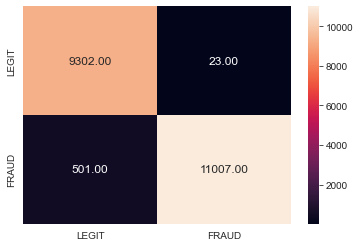


The Receiver Operating Characteristic (ROC) curve is


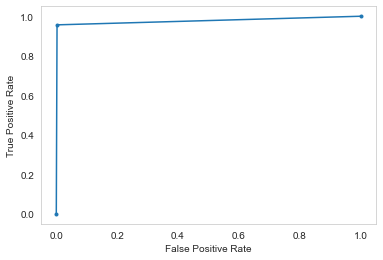


The Precision-Recall (PR) curve is


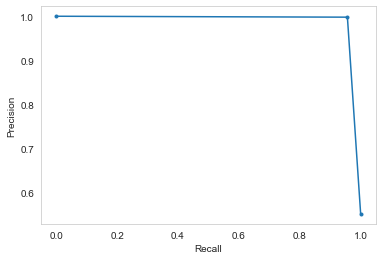

In [63]:
# Checking the other model performance metrics of the model selected after filtering the proper n_neighbours value

scores = performance_metrics(y_test, pred, props)
print_metrics('K-Nearest Neighbor (KNN)', scores)

# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)

In [64]:
# Finding the best parameters to use with K-Nearest Neighbor (KNN) Classifier using GridSearchCV for training the model

n_neighbors = (score_neighbours.index(max_score)+1)
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [n_neighbors],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [65]:
# Building the K-Nearest Neighbor (KNN) model with the parameters selected after filteration 

knn = grid_knn.best_estimator_
knn.fit(X_train,y_train)
props = knn.predict_proba(X_test)[:,1]
pred = knn.predict(X_test)


The classification_report of the model built using K-Nearest Neighbor (KNN) Classifier is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9325
           1       1.00      0.96      0.98     11508

    accuracy                           0.97     20833
   macro avg       0.97      0.98      0.97     20833
weighted avg       0.98      0.97      0.97     20833

The logloss of the model built using K-Nearest Neighbor (KNN) Classifier is 0.86873
The AUROC of the model built using K-Nearest Neighbor (KNN) Classifier is 0.97700
The AUPRC of the model built using K-Nearest Neighbor (KNN) Classifier is 0.97852

The confusion_matrix of the model built using K-Nearest Neighbor (KNN) Classifier is 
[[ 9302    23]
 [  501 11007]]


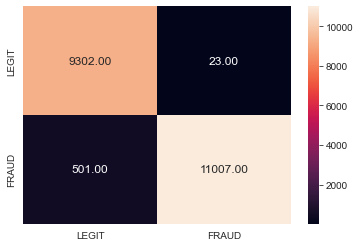


The Receiver Operating Characteristic (ROC) curve is


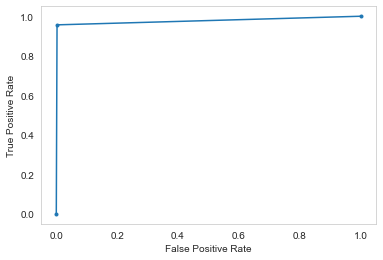


The Precision-Recall (PR) curve is


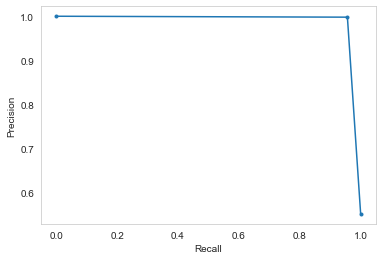

In [66]:
# Checking the other model performance metrics of the model filtered using GridSearchCV()

scores = performance_metrics(y_test, pred, props)
print_metrics('K-Nearest Neighbor (KNN)', scores)

# Displaying the confusion matrix as a heatmap, ROC curve and PR curve for visualization

disp_graphs(scores['confusion_matrix'], y_test, props)